In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fast_df=pd.read_csv('CNT_FAST_RANS_cylinder/CNT_FAST_RANS.csv')
sfast_df=pd.read_csv('CNT_SFAST_RANS_cylinder/CNT_SFAST.csv')
RANS_df=pd.read_csv('CNT_RANS_cylinder/CNT_RANS.csv')
test=pd.read_csv('CNT_RANS_cylinder/test.csv')
print(test.columns)
# sub_sfast=sfast_df[sfast_df['Point ID']==[3429,3409,3599,3579,3579,3559,3549,3539,3529,3519,3509,100,110,120,130,140,150,170,180,190,0,20,30,40,70,
#                                            90,3489,3499,80,60,50,10,160,3479,3469,3459,3449,3439,3419,3589,3569]]
sub_sfast=test[test["Cell ID"].isin([3509,3519,3529,3539,3549,3559,3569,3579,3589,3599,3409,3419,3429,3439,3449,3459,3469,3479,3489,3499,90,80,70,60,50,40,30,20,10,0,190,180,170,160,160,150,140,130,120,110,100])]
custom_order = [3509, 3519, 3529, 3539, 3549, 3559, 3569, 3579, 3589, 3599, 
                3409, 3419, 3429, 3439, 3449, 3459, 3469, 3479, 3489, 3499, 
                90, 80, 70, 60, 50, 40, 30, 20, 10, 0, 190, 180, 170, 160, 150, 140, 130, 120, 110, 100]

# Convert "Cell ID" to a categorical data type with the desired order
cat_dtype = pd.CategoricalDtype(categories=custom_order, ordered=True)
sub_sfast['Cell ID'] = sub_sfast['Cell ID'].astype(cat_dtype)

# Sort the DataFrame based on the custom order of "Cell ID"
sub_sfast = sub_sfast.sort_values('Cell ID')

# Reset the index (optional)
sub_sfast = sub_sfast.reset_index(drop=True)
sub_sfast=sub_sfast[sub_sfast['Block Number']==2]
# Now, sub_sfast is sorted based on the custom order of "Cell ID"
print(sub_sfast)
print(sub_sfast.head())

	

Index(['drdt', 'nut', 'M', 'N', 'r_het', 'rho', 'k', 'supersat', 'I', 'alphat',
       'p', 'T', 'r_crit', 'epsilon', 'U:0', 'U:1', 'U:2', 'Cell Type',
       'Cell ID', 'Block Number'],
      dtype='object')
            drdt       nut         M          N     r_het       rho        k  \
0  -3.984680e-09  0.047454  1.000000  1642460.0  0.005258  0.603051  68.1480   
1  -3.806630e-09  0.046352  1.000000  1642380.0  0.005258  0.602896  65.4663   
2  -3.648530e-09  0.048539  1.000000  1640270.0  0.005260  0.602079  65.1158   
3  -3.140580e-09  0.046574  1.000000  1638500.0  0.005262  0.600723  64.4972   
4  -2.703160e-09  0.048554  1.000000  1634930.0  0.005266  0.599158  66.6686   
5  -1.995500e-09  0.050069  1.000000  1633070.0  0.005268  0.597465  67.3877   
6  -1.363460e-09  0.047347  1.000000  1629480.0  0.005272  0.595299  67.3090   
7  -4.780320e-10  0.048861  1.000000  1627590.0  0.005274  0.593132  68.9481   
8   2.402900e-10  0.050463  1.000000  1629540.0  0.005272  0.590632  70

/tmp/ipykernel_16211/2117400442.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sfast['Cell ID'] = sub_sfast['Cell ID'].astype(cat_dtype)


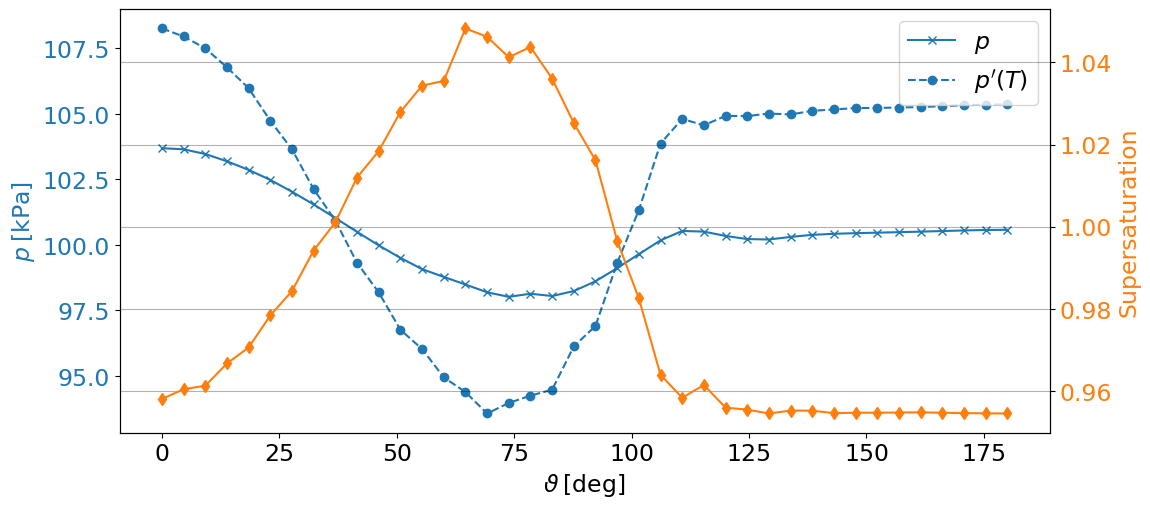

In [15]:
angle=np.linspace(0,180,40)
plt.rc('font', size=17) 
# sns.set_style('whitegrid')
fig, ax1 = plt.subplots(1,figsize=(12,5.5))

ax1.plot(angle,np.array(sub_sfast['p'])*1e-3,marker="x",label=r"$p$")
ax1.set_xlabel(r'$\vartheta\: [\mathrm{deg}]$')
ax1.set_ylabel(r'$p\:[\mathrm{kPa}]$',color='C0')
ax1.tick_params(axis ='y', labelcolor = 'C0')
# ax2 = ax1.twinx()
p_sat=101325*np.exp(-(2256500/461.4)*((1/np.array(sub_sfast['T']))-(1/373)))
ax1.plot(angle,p_sat*1e-3,color='C0',marker="o",linestyle='--',label=r"$p'(T)$")

# ax2.set_ylabel('temperature',color='C1') 
# ax2.tick_params(axis ='y', labelcolor = 'C1')
ax3=ax1.twinx()
ax3.set_ylabel('Supersaturation',color='C1') 
ax3.tick_params(axis ='y', labelcolor = 'C1')
ax3.plot(angle,np.array(sub_sfast['supersat'])-1,color='C1',marker='d',label=r"Supersaturation")
# rspine = ax3.spines['right']
# rspine.set_position(('axes', 1.1))
# ax1.set_xlim([0,60])

# legend.set_zorder(100) 
# ax3.set_zorder(99)
ax3.grid(color='k',alpha=0.3,zorder=0)

legend=ax1.legend(loc='upper right')
# ax3.grid(color='C1',alpha=0.3)
fig.savefig('../Reports/Final_report/Figures/supersat_angular.pdf')
fig.savefig('../Codes/Plots/supersat_angular.png',transparent=True)

In [3]:
angles = np.linspace(0, 2*np.pi, 100)
x = 0.5 * np.cos(angles)
y = 0.5 * np.sin(angles)

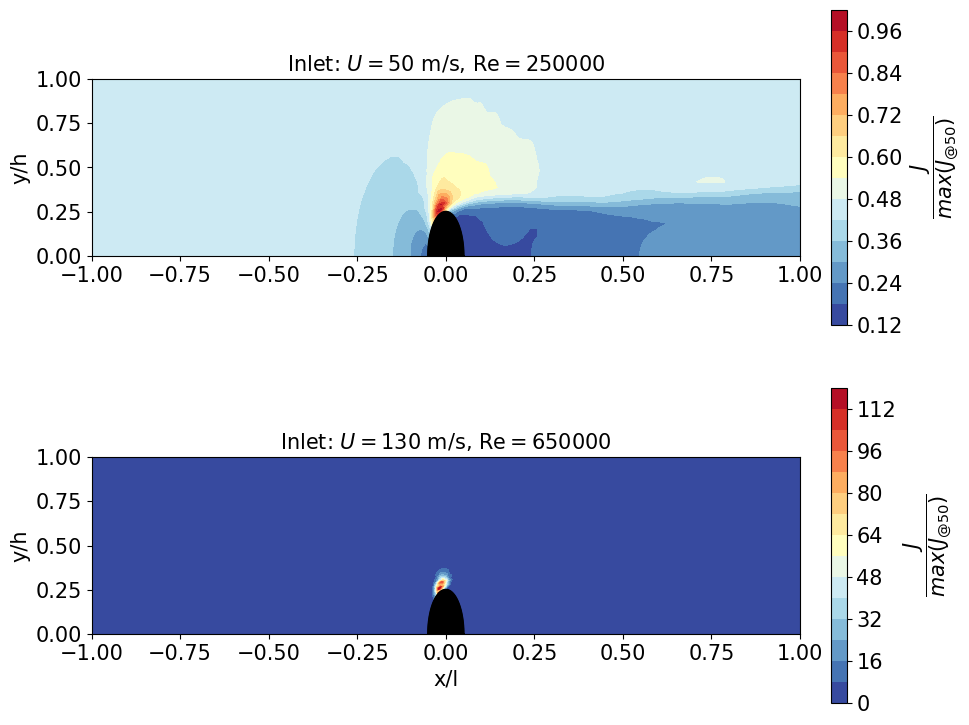

In [6]:
fig = plt.figure(figsize=(10,9))
plt.rc('font', size=15) 
# plt.subplots_adjust(hspace=0.2)
ax1 = fig.add_subplot(2,1,1, adjustable='box', aspect=0.5)
# ax2 = fig.add_subplot(2,1,2, adjustable='box', aspect=0.5)
ax3 = fig.add_subplot(2,1,2, adjustable='box', aspect=0.5)
set1=ax1.tricontourf(RANS_df['Points:0']/np.max(RANS_df['Points:0']),RANS_df['Points:1']/np.max(RANS_df['Points:1']),RANS_df['I']/np.max(RANS_df['I']),cmap=plt.get_cmap('RdYlBu_r'),levels=15)
ax1.plot(x/np.max(RANS_df['Points:0']),y/np.max(RANS_df['Points:1']),color='k')
ax1.fill(x/np.max(RANS_df['Points:0']),y/np.max(RANS_df['Points:1']),color='k')

ax1.set_ylim([0,1])
ax1.set_xlim([-1,1])
# ax1.set_xlabel('x/l')
ax1.set_ylabel('y/h')
ax1.set_title('Inlet: $U=50$ m/s, $\mathrm{Re}=250000$',fontsize=15)


# set2=ax2.tricontourf(fast_df['Points:0']/np.max(fast_df['Points:0']),fast_df['Points:1']/np.max(fast_df['Points:1']),fast_df['I']/np.max(RANS_df['I']),cmap=plt.get_cmap('RdYlBu_r'),levels=15)
# ax2.plot(x/np.max(fast_df['Points:0']),y/np.max(fast_df['Points:1']),color='k')
# ax2.fill(x/np.max(fast_df['Points:0']),y/np.max(fast_df['Points:1']),color='k')
# ax2.set_ylim([0,1])
# ax2.set_xlim([-1,1])

# # ax2.set_xlabel('x/l')
# ax2.set_ylabel('y/h')
# ax2.set_title('Inlet: $U=90$ m/s, $\mathrm{Re}=450000$',fontsize=15)

set3=ax3.tricontourf(sfast_df['Points:0']/np.max(sfast_df['Points:0']),sfast_df['Points:1']/np.max(sfast_df['Points:1']),sfast_df['I']/np.max(RANS_df['I']),cmap=plt.get_cmap('RdYlBu_r'),levels=15)
ax3.plot(x/np.max(sfast_df['Points:0']),y/np.max(sfast_df['Points:1']),color='k')
ax3.fill(x/np.max(sfast_df['Points:0']),y/np.max(sfast_df['Points:1']),color='k')

ax3.set_ylim([0,1])
ax3.set_xlim([-1,1])
ax3.set_xlabel('x/l')
ax3.set_ylabel('y/h')
ax3.set_title('Inlet: $U=130$ m/s, $\mathrm{Re}=650000$',fontsize=15)


col1=fig.colorbar(set1,fraction=0.046, pad=0.04)
col1.set_label(r'$\dfrac{J}{max(J_{@50})}$')
# col2=fig.colorbar(set2,fraction=0.046, pad=0.04)
# col2.set_label(r'$\dfrac{J}{max(J_{@50})}$')
col3=fig.colorbar(set3,fraction=0.046, pad=0.04)
col3.set_label(r'$\dfrac{J}{max(J_{@50})}$')
# fig.savefig('../Reports/Final_report/Figures/I_plot_speed_compare.pdf')
fig.savefig('../Codes/Plots/I_plot_speed_compare.png',transparent=True)

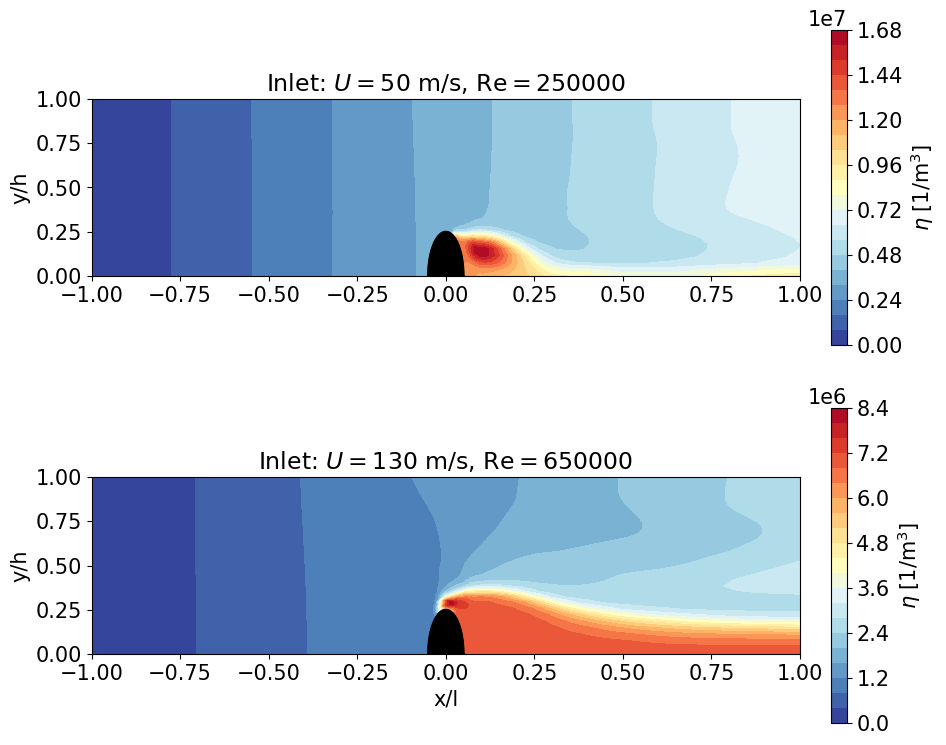

In [9]:
fig = plt.figure(figsize=(10,9))
# plt.subplots_adjust(hspace=0.2)
ax1 = fig.add_subplot(2,1,1, adjustable='box', aspect=0.5)
# ax2 = fig.add_subplot(3,1,2, adjustable='box', aspect=0.5)
ax3 = fig.add_subplot(2,1,2, adjustable='box', aspect=0.5)

set1=ax1.tricontourf(RANS_df['Points:0']/np.max(RANS_df['Points:0']),RANS_df['Points:1']/np.max(RANS_df['Points:1']),RANS_df['N'],cmap=plt.get_cmap('RdYlBu_r'),levels=20)
ax1.plot(x/np.max(RANS_df['Points:0']),y/np.max(RANS_df['Points:1']),color='k')
ax1.fill(x/np.max(RANS_df['Points:0']),y/np.max(RANS_df['Points:1']),color='k')

ax1.set_ylim([0,1])
ax1.set_xlim([-1,1])
# ax1.set_xlabel('x/l')
ax1.set_ylabel('y/h')
ax1.set_title('Inlet: $U=50$ m/s, $\mathrm{Re}=250000$',fontsize=17)


# set2=ax2.tricontourf(fast_df['Points:0']/np.max(fast_df['Points:0']),fast_df['Points:1']/np.max(fast_df['Points:1']),fast_df['N'],cmap=plt.get_cmap('RdYlBu_r'),levels=20)
# ax2.plot(x/np.max(fast_df['Points:0']),y/np.max(fast_df['Points:1']),color='k')
# ax2.fill(x/np.max(fast_df['Points:0']),y/np.max(fast_df['Points:1']),color='k')
# ax2.set_ylim([0,1])
# ax2.set_xlim([-1,1])

# # ax2.set_xlabel('x/l')
# ax2.set_ylabel('y/h')
# ax2.set_title('Inlet: $U=90$ m/s, $\mathrm{Re}=450000$',fontsize=17)

set3=ax3.tricontourf(sfast_df['Points:0']/np.max(sfast_df['Points:0']),sfast_df['Points:1']/np.max(sfast_df['Points:1']),sfast_df['N'],cmap=plt.get_cmap('RdYlBu_r'),levels=20)
ax3.plot(x/np.max(sfast_df['Points:0']),y/np.max(sfast_df['Points:1']),color='k')
ax3.fill(x/np.max(sfast_df['Points:0']),y/np.max(sfast_df['Points:1']),color='k')

ax3.set_ylim([0,1])
ax3.set_xlim([-1,1])
ax3.set_xlabel('x/l')
ax3.set_ylabel('y/h')
ax3.set_title('Inlet: $U=130$ m/s, $\mathrm{Re}=650000$',fontsize=17)

col1=fig.colorbar(set1,fraction=0.046, pad=0.04)
col1.set_label(r'$\eta$ [$1/\mathrm{m}^3$]')
# col2=fig.colorbar(set2,fraction=0.046, pad=0.04)
# col2.set_label(r'$\eta$ [$1/\mathrm{m}^3$]')
col3=fig.colorbar(set3,fraction=0.046, pad=0.04)
col3.set_label(r'$\eta$ [$1/\mathrm{m}^3$]')
# fig.savefig('../Reports/Final_report/Figures/N_plot_speed_compare.pdf')
fig.savefig('../Codes/Plots/N_plot_speed_compare.png',transparent=True)

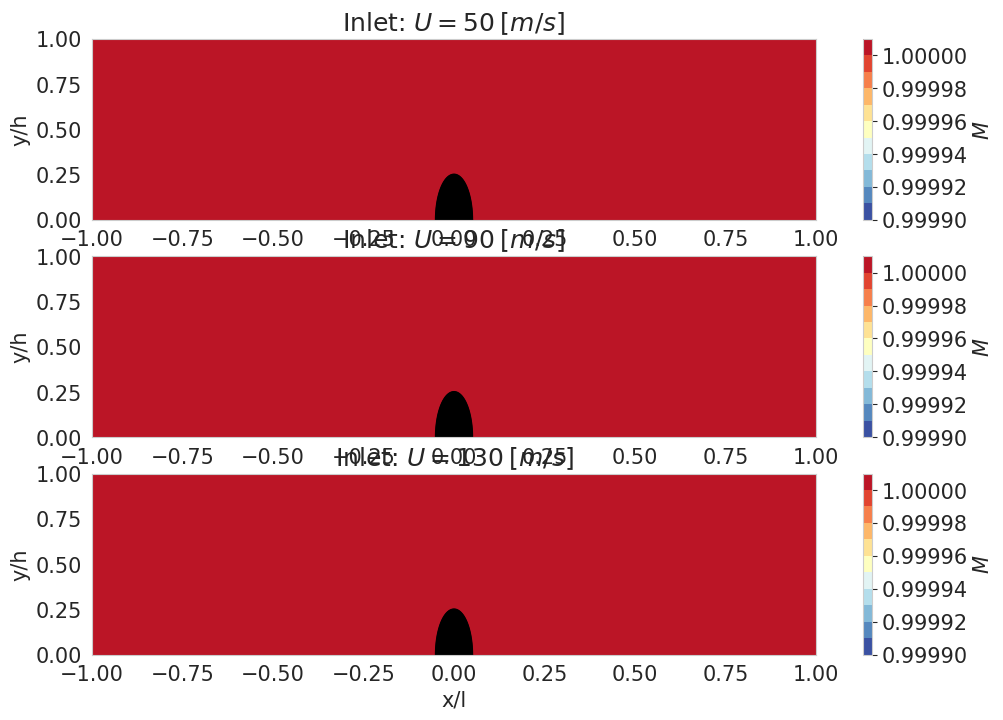

In [18]:
fig = plt.figure(figsize=(12,9))
ax1 = fig.add_subplot(3,1,1, adjustable='box', aspect=0.5)
ax2 = fig.add_subplot(3,1,2, adjustable='box', aspect=0.5)
ax3 = fig.add_subplot(3,1,3, adjustable='box', aspect=0.5)
MM=np.array(RANS_df['M'])
MMM=np.array(fast_df['M'])
set1=ax1.tricontourf(RANS_df['Points:0']/np.max(RANS_df['Points:0']),RANS_df['Points:1']/np.max(RANS_df['Points:1']),MM,cmap=plt.get_cmap('RdYlBu_r'),levels=np.arange(0.9999, 1.00001,0.00001))
ax1.plot(x/np.max(RANS_df['Points:0']),y/np.max(RANS_df['Points:1']),color='k')
ax1.fill(x/np.max(RANS_df['Points:0']),y/np.max(RANS_df['Points:1']),color='k')

ax1.set_ylim([0,1])
ax1.set_xlim([-1,1])
ax1.set_xlabel('x/l')
ax1.set_ylabel('y/h')
ax1.set_title('Inlet: $U=50\: [m/s]$')


set2=ax2.tricontourf(fast_df['Points:0']/np.max(fast_df['Points:0']),fast_df['Points:1']/np.max(fast_df['Points:1']),MMM,cmap=plt.get_cmap('RdYlBu_r'),levels=np.arange(0.9999, 1.00001,0.00001))
ax2.plot(x/np.max(fast_df['Points:0']),y/np.max(fast_df['Points:1']),color='k')
ax2.fill(x/np.max(fast_df['Points:0']),y/np.max(fast_df['Points:1']),color='k')
ax2.set_ylim([0,1])
ax2.set_xlim([-1,1])

ax2.set_xlabel('x/l')
ax2.set_ylabel('y/h')
ax2.set_title('Inlet: $U=90\: [m/s]$')

set3=ax3.tricontourf(sfast_df['Points:0']/np.max(sfast_df['Points:0']),sfast_df['Points:1']/np.max(sfast_df['Points:1']),sfast_df['M'],cmap=plt.get_cmap('RdYlBu_r'),levels=np.arange(0.9999, 1.00001,0.00001))
ax3.plot(x/np.max(sfast_df['Points:0']),y/np.max(sfast_df['Points:1']),color='k')
ax3.fill(x/np.max(sfast_df['Points:0']),y/np.max(sfast_df['Points:1']),color='k')

ax3.set_ylim([0,1])
ax3.set_xlim([-1,1])
ax3.set_xlabel('x/l')
ax3.set_ylabel('y/h')
ax3.set_title('Inlet: $U=130\: [m/s]$')

col1=fig.colorbar(set1)
col1.set_label(r'$M$')
col2=fig.colorbar(set2)
col2.set_label(r'$M$')
col3=fig.colorbar(set3)
col3.set_label(r'$M$')
fig.savefig('../Reports/Final_report/Figures/M_plot_speed_compare.pdf')

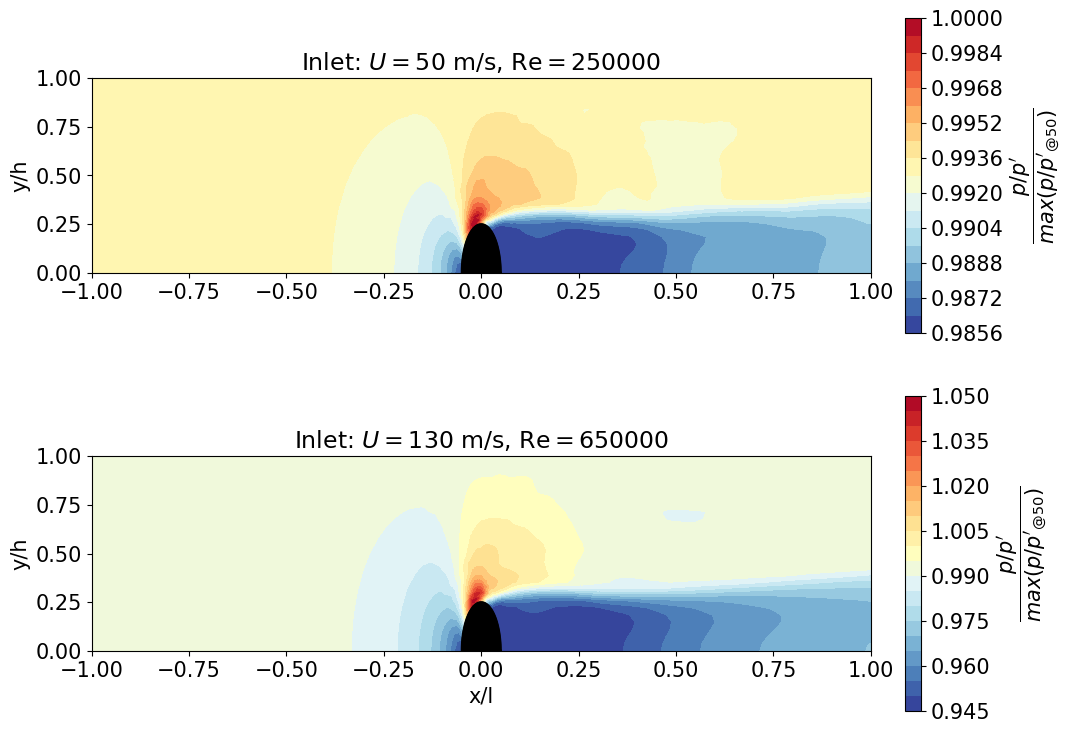

In [11]:
fig = plt.figure(figsize=(11,9))
# plt.subplots_adjust(hspace=0.3)
ax1 = fig.add_subplot(2,1,1, adjustable='box', aspect=0.5)
# ax2 = fig.add_subplot(3,1,2, adjustable='box', aspect=0.5)
ax3 = fig.add_subplot(2,1,2, adjustable='box', aspect=0.5)

set1=ax1.tricontourf(RANS_df['Points:0']/np.max(RANS_df['Points:0']),RANS_df['Points:1']/np.max(RANS_df['Points:1']),RANS_df['supersat']/np.max(RANS_df['supersat']),cmap=plt.get_cmap('RdYlBu_r'),levels=20)
ax1.plot(x/np.max(RANS_df['Points:0']),y/np.max(RANS_df['Points:1']),color='k')
ax1.fill(x/np.max(RANS_df['Points:0']),y/np.max(RANS_df['Points:1']),color='k')

ax1.set_ylim([0,1])
ax1.set_xlim([-1,1])
# ax1.set_xlabel('x/l')
ax1.set_ylabel('y/h')
ax1.set_title('Inlet: $U=50$ m/s, $\mathrm{Re}=250000$',fontsize=17)


# set2=ax2.tricontourf(fast_df['Points:0']/np.max(fast_df['Points:0']),fast_df['Points:1']/np.max(fast_df['Points:1']),fast_df['supersat']/np.max(RANS_df['supersat']),cmap=plt.get_cmap('RdYlBu_r'),levels=20)
# ax2.plot(x/np.max(fast_df['Points:0']),y/np.max(fast_df['Points:1']),color='k')
# ax2.fill(x/np.max(fast_df['Points:0']),y/np.max(fast_df['Points:1']),color='k')
# ax2.set_ylim([0,1])
# ax2.set_xlim([-1,1])

# # ax2.set_xlabel('x/l')
# ax2.set_ylabel('y/h')
# ax2.set_title('Inlet: $U=90$ m/s, $\mathrm{Re}=450000$',fontsize=17)

set3=ax3.tricontourf(sfast_df['Points:0']/np.max(sfast_df['Points:0']),sfast_df['Points:1']/np.max(sfast_df['Points:1']),sfast_df['supersat']/np.max(RANS_df['supersat']),cmap=plt.get_cmap('RdYlBu_r'),levels=20)
ax3.plot(x/np.max(sfast_df['Points:0']),y/np.max(sfast_df['Points:1']),color='k')
ax3.fill(x/np.max(sfast_df['Points:0']),y/np.max(sfast_df['Points:1']),color='k')

ax3.set_ylim([0,1])
ax3.set_xlim([-1,1])
ax3.set_xlabel('x/l')
ax3.set_ylabel('y/h')
ax3.set_title('Inlet: $U=130$ m/s, $\mathrm{Re}=650000$',fontsize=17)

col1=fig.colorbar(set1,fraction=0.046, pad=0.04)
col1.set_label(r"$\dfrac{p/p'}{max(p/p'_{@50})}$")
# col2=fig.colorbar(set2,fraction=0.046, pad=0.04)
# col2.set_label(r"$\dfrac{p/p'}{max(p/p'_{@50})}$")
col3=fig.colorbar(set3,fraction=0.046, pad=0.04)
col3.set_label(r"$\dfrac{p/p'}{max(p/p'_{@50})}$")
# fig.savefig('../Reports/Final_report/Figures/supersat_plot_speed_compare.pdf')
fig.savefig('../Codes/Plots/supersat_plot_speed_compare.png',transparent=True)

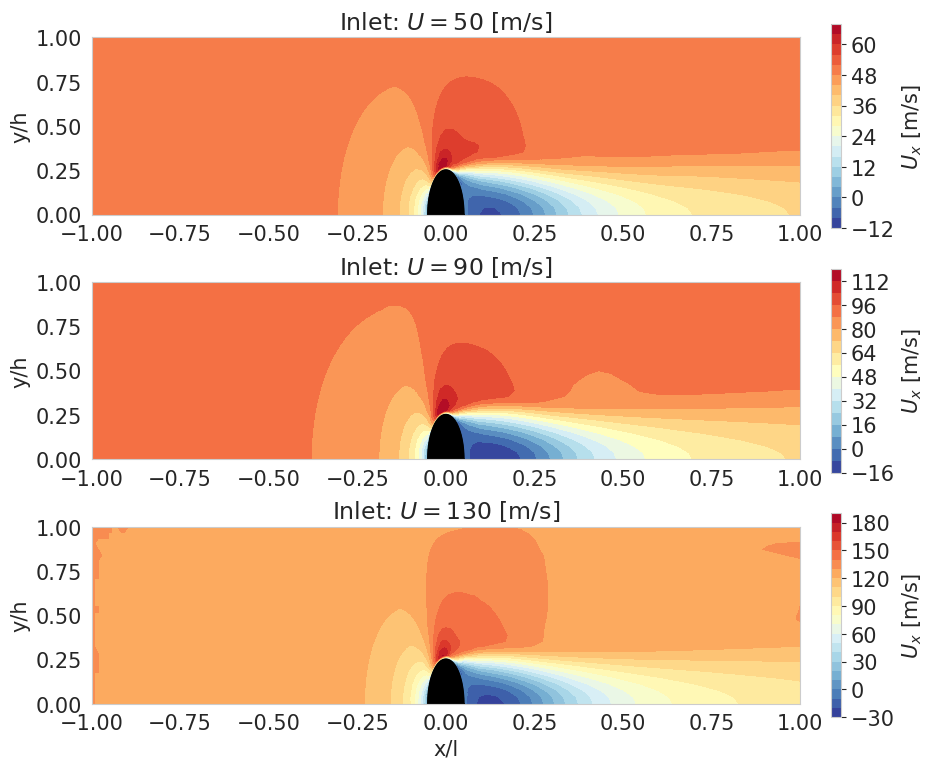

In [57]:
fig = plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.2)
ax1 = fig.add_subplot(3,1,1, adjustable='box', aspect=0.5)
ax2 = fig.add_subplot(3,1,2, adjustable='box', aspect=0.5)
ax3 = fig.add_subplot(3,1,3, adjustable='box', aspect=0.5)

set1=ax1.tricontourf(RANS_df['Points:0']/np.max(RANS_df['Points:0']),RANS_df['Points:1']/np.max(RANS_df['Points:1']),RANS_df['U:0'],cmap=plt.get_cmap('RdYlBu_r'),levels=20)
ax1.plot(x/np.max(RANS_df['Points:0']),y/np.max(RANS_df['Points:1']),color='k')
ax1.fill(x/np.max(RANS_df['Points:0']),y/np.max(RANS_df['Points:1']),color='k')

ax1.set_ylim([0,1])
ax1.set_xlim([-1,1])
# ax1.set_xlabel('x/l')
ax1.set_ylabel('y/h')
ax1.set_title('Inlet: $U=50$ [m/s]',fontsize=17)


set2=ax2.tricontourf(fast_df['Points:0']/np.max(fast_df['Points:0']),fast_df['Points:1']/np.max(fast_df['Points:1']),fast_df['U:0'],cmap=plt.get_cmap('RdYlBu_r'),levels=20)
ax2.plot(x/np.max(fast_df['Points:0']),y/np.max(fast_df['Points:1']),color='k')
ax2.fill(x/np.max(fast_df['Points:0']),y/np.max(fast_df['Points:1']),color='k')
ax2.set_ylim([0,1])
ax2.set_xlim([-1,1])

# ax2.set_xlabel('x/l')
ax2.set_ylabel('y/h')
ax2.set_title('Inlet: $U=90$ [m/s]',fontsize=17)

set3=ax3.tricontourf(sfast_df['Points:0']/np.max(sfast_df['Points:0']),sfast_df['Points:1']/np.max(sfast_df['Points:1']),sfast_df['U:0'],cmap=plt.get_cmap('RdYlBu_r'),levels=20)
ax3.plot(x/np.max(sfast_df['Points:0']),y/np.max(sfast_df['Points:1']),color='k')
ax3.fill(x/np.max(sfast_df['Points:0']),y/np.max(sfast_df['Points:1']),color='k')

ax3.set_ylim([0,1])
ax3.set_xlim([-1,1])
ax3.set_xlabel('x/l')
ax3.set_ylabel('y/h')
ax3.set_title('Inlet: $U=130$ [m/s]',fontsize=17)

col1=fig.colorbar(set1,fraction=0.046, pad=0.04)
col1.set_label(r'$U_{x}$ [$\mathrm{m/s}$]')
col2=fig.colorbar(set2,fraction=0.046, pad=0.04)
col2.set_label(r'$U_{x}$ [$\mathrm{m/s}$]')
col3=fig.colorbar(set3,fraction=0.046, pad=0.04)
col3.set_label(r'$U_{x}$ [$\mathrm{m/s}$]')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dropwise
dT=[1,2,4,6]
q_RK=[]
Asl=[]
q_flux=[]
print('start 100')
for i in dT:
        dict=dropwise.Condense(T_wall=373-i,T_inf=373,theta=90,endtime=15000,step=0.05,total_pressure=101325,lat_heat=2256400,accom=0.02) 
        r_max=dict['r_max']
        print(r_max)
        r_e=dict['r_e']
        
        
        last=np.where(dict['r'][0]<r_max)[-1][-1]
        q=np.array(dict['q'][0:last])
        nr=np.array(dict['n_r'][0:last])
        
        q_flux.append(np.trapz(q*nr,dict['r'][0][0:last]))
q_flux=np.array(q_flux)*1e-3

q_RK=[]
Asl=[]
q_flux_sigma4=[]
print('start 100')
for i in dT:
        dict4=dropwise.Condense(T_wall=373-i,T_inf=373,theta=90,endtime=15000,step=0.05,total_pressure=101325,lat_heat=2256400,accom=0.04) 
        r_max=dict['r_max']
        r_e=dict['r_e']
        
        
        last=np.where(dict4['r'][0]<r_max)[-1][-1]
        q4=np.array(dict4['q'][0:last])
        nr4=np.array(dict4['n_r'][0:last])
        
        q_flux_sigma4.append(np.trapz(q4*nr4,dict4['r'][0][0:last]))
q_flux_sigma4=np.array(q_flux_sigma4)*1e-3

dT100=[1,2,3,4,5,6]
q_RK=[]
Asl=[]
q_flux100=[]
print('start 90')
for i in dT100:
        dict100=dropwise.Condense(T_wall=373-i,T_inf=373,theta=90,endtime=15000,step=0.01,total_pressure=101325,lat_heat=2256400,accom=0.3) 
        r_max=dict100['r_max']
        r_e=dict100['r_min']
        print(dict100['r_min'])
        print(dict100['r_max'])
        
        last=np.where(dict100['r'][0]<r_max)[-1][-1]
        print(dict100['r'][0][last])
        q100=np.array(dict100['q'][0:last])
        nr100=np.array(dict100['n_r'][0:last])
        print(nr)
        q_flux100.append(np.trapz(q100*nr100,dict100['r'][0][0:last]))
q_flux_100=np.array(q_flux100)*1e-3

print(dict100['r'][0][0:last])



start 100
0.004376420002564012
0.004376420002564012
0.004376420002564012
0.004376420002564012
start 100
start 90
2.0190439770365694e-08
0.004376420002564012
0.0043312773729512625
[2.48416327e+22 1.95788170e+17 1.27720706e+15 1.00883264e+13
 9.07346037e+11 1.27163957e+11 2.37132272e+10 4.48004169e+09
 1.06923671e+09 1.59858567e+08 5.75706742e+07 1.54535264e+07]
1.0095219885182847e-08
0.004376420002564012
0.004078988460676918
[2.48416327e+22 1.95788170e+17 1.27720706e+15 1.00883264e+13
 9.07346037e+11 1.27163957e+11 2.37132272e+10 4.48004169e+09
 1.06923671e+09 1.59858567e+08 5.75706742e+07 1.54535264e+07]
6.7301465901218986e-09
0.004376420002564012
0.003733003687664486
[2.48416327e+22 1.95788170e+17 1.27720706e+15 1.00883264e+13
 9.07346037e+11 1.27163957e+11 2.37132272e+10 4.48004169e+09
 1.06923671e+09 1.59858567e+08 5.75706742e+07 1.54535264e+07]
5.0476099425914235e-09
0.004376420002564012
0.0042234860656947025
[2.48416327e+22 1.95788170e+17 1.27720706e+15 1.00883264e+13
 9.07346037e

[1922363.7 1921574.7 1920011.4 1918439.2 1916847.1 1915240.8]
[261.81861522 265.42593704 272.63909797 279.84105022 287.03199698
 294.21305956]


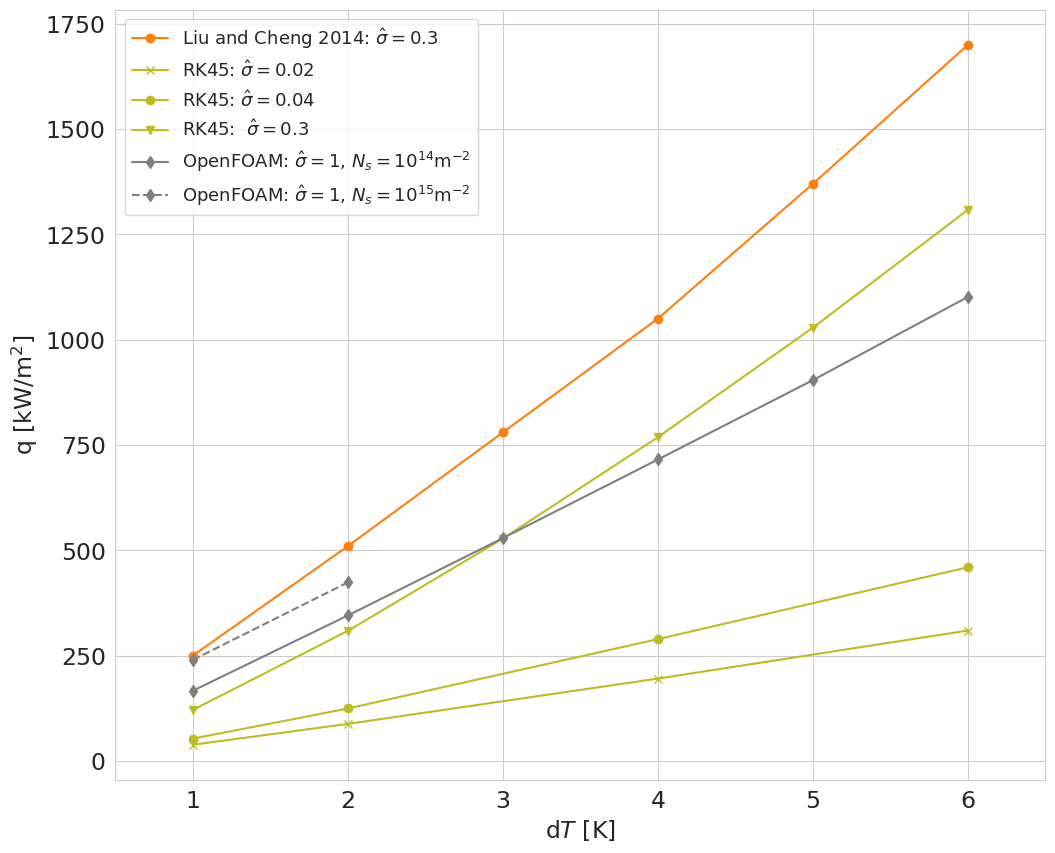

In [2]:
qd_grob=np.array([0.29983443,0.30409034,0.31260856,0.32112929,0.32965478,0.33818559])*10**-3
N_grob=np.array([1922363.7,1921574.7,1920011.4,1918439.2,1916847.1,1915240.8])
qd_fine=np.array([0.19951019,0.19951443])*10**(-3)
N_fine=np.array([8920180.7,8919574.6])
A_grob=0.5*1
V_grob=A_grob*0.454238
num_d_grob=N_grob*V_grob

dT=[1,2,4,6,8,10]
dT_planar=[1,2,4,6,8,10]
kW_A=[160,225,360,480,620,750]


sns.set_style("whitegrid")
plt.rc('font', size=17) 
fig_k = plt.figure(figsize=(12,10))
ax = fig_k.add_subplot(1, 1, 1)
# ax.plot(dT,kW_A,marker='<',label=r"Khandekar 2020: $T'=303$K, $\theta=100$°, $N_{s}=10^{10}$m$^{-2}$")
# ax.plot([1,2,4,6,8],[80,180,380,600,800],marker='*',color='C4',label="Le Fevre and Rose 1966")
# ax.scatter([1,1],[0.8*1e2,1.1*1e2],marker='x',color='C2',label="Marengo 2022")
ax.plot([1,2,3,4,5,6],[250,510,780,1050,1370,1700],marker='o',color='C1',label=r"Liu and Cheng 2014: $\hat{\sigma}=0.3$")
# ax.scatter([10],[76,105],marker='*',label="Marengo: Two population models")#h_int 15.7 MW/m2K
# ax.plot(dT_planar,qd_grob*num_d_grob/A_grob,
#         marker='x',color='C4',label="OF: Population @ $10^6$cm$^-2$, high first cell ")# h_int 0.320300 MW/m2K
# ax.scatter([10],np.array([0.1977539])*10**(-3)*np.array([8922145.6])*0.0921276,
#            marker='d',label="low first cell, linear hp",color='C2')
# ax.plot([1,10],qd_fine*N_fine*0.0921276,
#         marker='.', color=[1.0, 0.5, 0.25],label='Low first cell')
# ax.plot([2,10],np.array([0.37792607,0.41998976])*10**(-3)*np.array([991236.26,988999.71])*0.884471,
#         marker='*', color='C5',label='Very high first cell')
# ax.scatter([1,10],np.array([0.1414632,0.15549568])*10**(-3)*np.array([17220463,16930212])*0.0461374,
#            marker='d',color='C7',label="very low first cell")
ax.plot([1,2,4,6],q_flux,marker='x',color='C8',label=r"RK45: $\hat{\sigma}=0.02$")
ax.plot([1,2,4,6],q_flux_sigma4,marker='o',color='C8',label=r"RK45: $\hat{\sigma}=0.04$")
ax.plot([1,2,3,4,5,6],q_flux_100,marker='v',color='C8',label=r"RK45:  $\hat{\sigma}=0.3$")
# ax.plot([1,4,6,8,10],[37.824281,153.57095,232.24266,312.16413,393.34345],marker='d',color='C7',label=r"OpenFOAM: $T'=303$K, $\theta=100$°, $N_{s}=10^{10}$m$^{-2}$")
ax.plot([1,2,3,4,5,6],[166.60579,345.30684,528.93038,715.42256,903.90287,1101.534],marker='d',color='C7',label=r"OpenFOAM: $\hat{\sigma}=1$, $N_{s}=10^{14}$m$^{-2}$")
ax.plot([1,2],[239.89953,423.78542],marker='d',linestyle='--',color='C7',label=r"OpenFOAM: $\hat{\sigma}=1$, $N_{s}=10^{15}$m$^{-2}$")


ax.set_xlim([0.5,6.5])
plt.rc('font', size=17) 
ax.set_ylabel('q [kW/m$^{2}$]')
ax.set_xlabel('d$T$ [K]')
ax.legend(prop={'size': 13})
print(N_grob)
print(qd_grob*num_d_grob/A_grob)
# fig_k.savefig('../Reports/Final_report/Figures/heatflux_compare.pdf')
fig_k.savefig('../Codes/Plots/heatflux_compare.png',transparent=True)

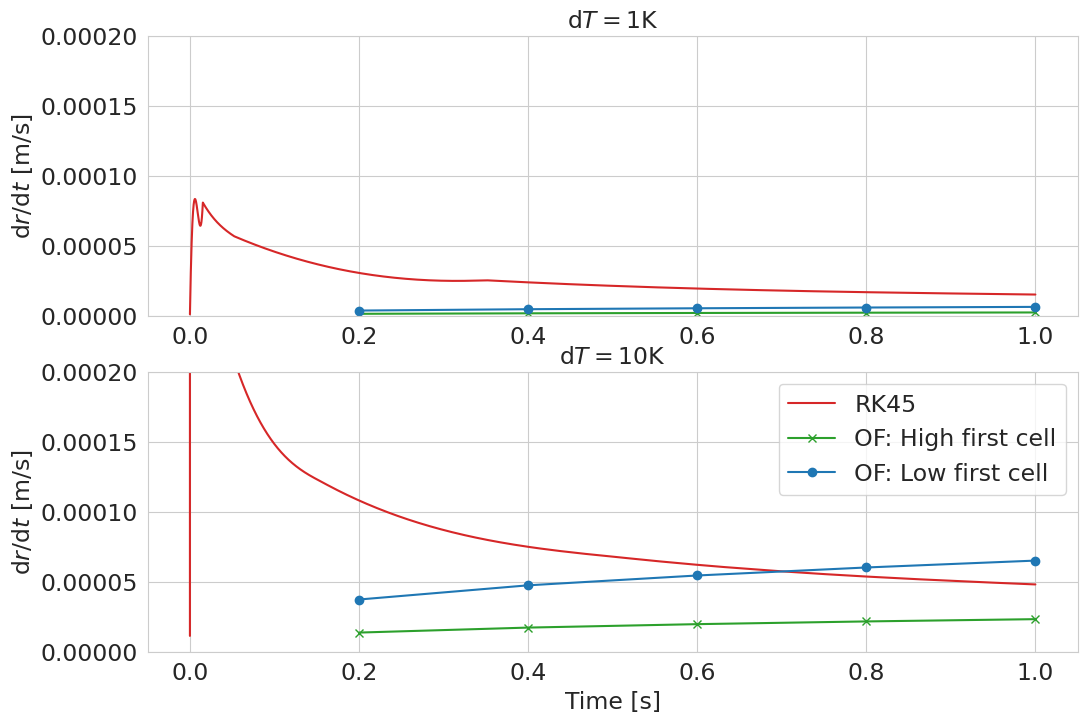

In [2]:
import dropwise
sns.set_style("whitegrid")
plt.rc('font', size=17) 
dict1=dropwise.Condense(T_wall=302,T_inf=303,theta=100,endtime=1,step=1e-7,lat_heat=2429800,accom=0.02)
dict10=dropwise.Condense(T_wall=293,T_inf=303,theta=100,endtime=1,step=1e-7,lat_heat=2429800,accom=0.02)
fig_drdt = plt.figure(figsize=(12,8))
plt.subplots_adjust(hspace=0.2)
ax1 = fig_drdt.add_subplot(2, 1, 1)
ax1.plot(dict1['time'][0],dict1['k_slope'][0],label='RK45',color='C3')
ax1.plot([0.2,0.4,0.6,0.8,1],[1.3654412e-06,1.7204327e-06,1.9689343e-06,2.1664461e-06,2.3329863e-06],marker='x',label='OF: High first cell',color='C2')
ax1.plot([0.2,0.4,0.6,0.8,1],[3.6883697e-06,4.6504897e-06,5.3233075e-06,5.859684e-06,6.3131559e-06],marker='o',label='OF: Low first cell')
ax2 = fig_drdt.add_subplot(2, 1, 2)
ax2.plot(dict10['time'][0],dict10['k_slope'][0],label='RK45',color='C3')
ax2.plot([0.2,0.4,0.6,0.8,1],[1.3678331e-05,1.7238126e-05,1.9694876e-05,2.163843e-05,2.3260857e-05],marker='x',label='OF: High first cell',color='C2')#done
ax2.plot([0.2,0.4,0.6,0.8,1],[3.7293092e-05,4.7429679e-05,5.4453007e-05,6.0170693e-05,6.5091365e-05],marker='o',label='OF: Low first cell')


ax2.set_title('$\mathrm{d}T=10$K',fontsize=17)
ax1.set_ylim([0,0.0002])
ax2.legend(loc='upper right')
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('$\mathrm{d}r/\mathrm{d}t$ [m/s]')

ax1.set_title('$\mathrm{d}T=1$K',fontsize=17)
ax2.set_ylim([0,0.0002])
# ax.legend(loc='upper right')
# ax.set_xlabel('Time [s]')
ax1.set_ylabel('$\mathrm{d}r/\mathrm{d}t$ [m/s]')
# fig_drdt.savefig('../Reports/Final_report/Figures/drdt_OF.pdf')
fig_drdt.savefig('../Codes/Plots/drdt_OF.png',transparent=True)

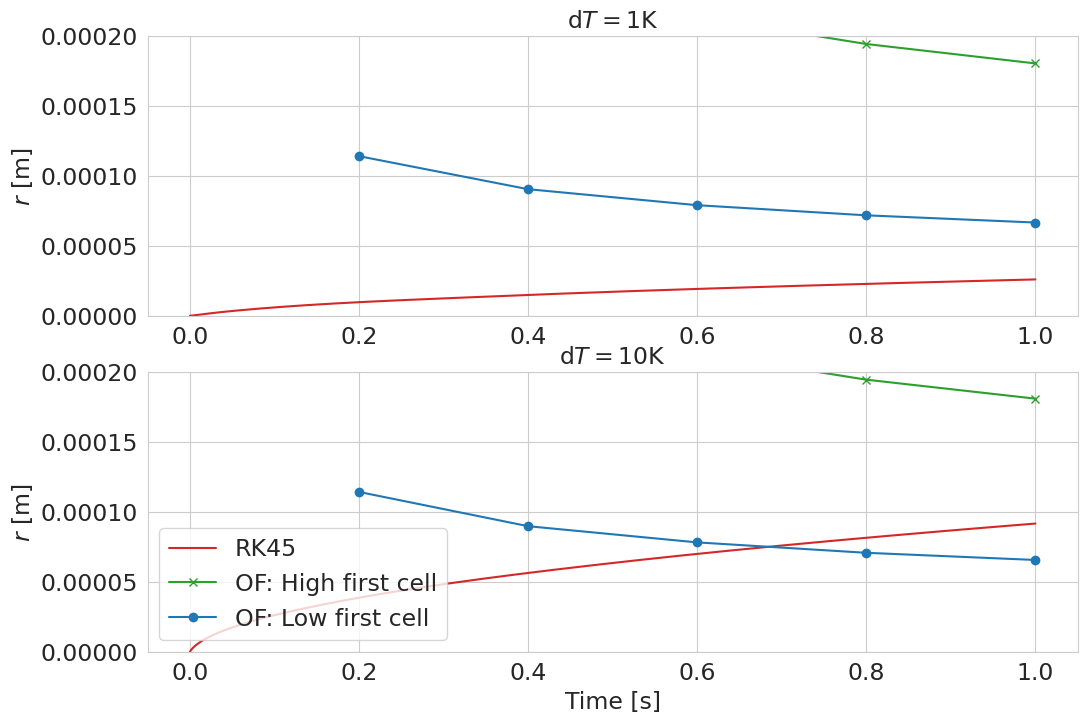

In [9]:
import dropwise
sns.set_style("whitegrid")
dict1=dropwise.Condense(T_wall=302,T_inf=303,theta=100,endtime=1,step=1e-6,lat_heat=2429800,accom=0.02)
fig_r_hat = plt.figure(figsize=(12,8))
plt.subplots_adjust(hspace=0.2)
ax = fig_r_hat.add_subplot(2, 1, 1)
ax.plot(dict1['time'][0],dict1['r'][0],label='RK45',color='C3')
ax.plot([0.2,0.4,0.6,0.8,1],[0.00030796014,0.00024440403,0.00021355011,0.00019407571,0.00018021743],marker='x',label='high first cell',color='C2')
ax.plot([0.2,0.4,0.6,0.8,1],[0.00011397053,9.0379529e-05,7.8948974e-05,7.1716878e-05,6.656127e-05],marker='o',label='low first cell')



ax.set_title(r'$\mathrm{d}T=1\mathrm{K}$',fontsize=17)

ax.set_ylim([0,0.0002])
# ax.legend()
# ax.set_xlabel('Time [s]')
ax.set_ylabel('$r$ [m]')
dict1=dropwise.Condense(T_wall=293,T_inf=303,theta=100,endtime=1,step=1e-6,lat_heat=2429800,accom=0.02)
ax2 = fig_r_hat.add_subplot(2, 1, 2)
ax2.plot(dict1['time'][0],dict1['r'][0],label='RK45',color='C3')
ax2.plot([0.2,0.4,0.6,0.8,1],[0.00030743479,0.00024393797,0.00021350336,0.00019432251,0.00018076551],marker='x',label='OF: High first cell',color='C2')
ax2.plot([0.2,0.4,0.6,0.8,1],[0.00011412905,8.9663041e-05,7.8090085e-05,7.0658531e-05,6.5541666e-05],marker='o',label='OF: Low first cell')


ax2.set_title('$\mathrm{d}T=10$K',fontsize=17)
ax2.set_ylim([0,0.0002])
ax2.legend(loc='lower left')
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('$r$ [m]')
fig_r_hat.savefig('../Reports/Final_report/Figures/r_bar_OF.pdf')

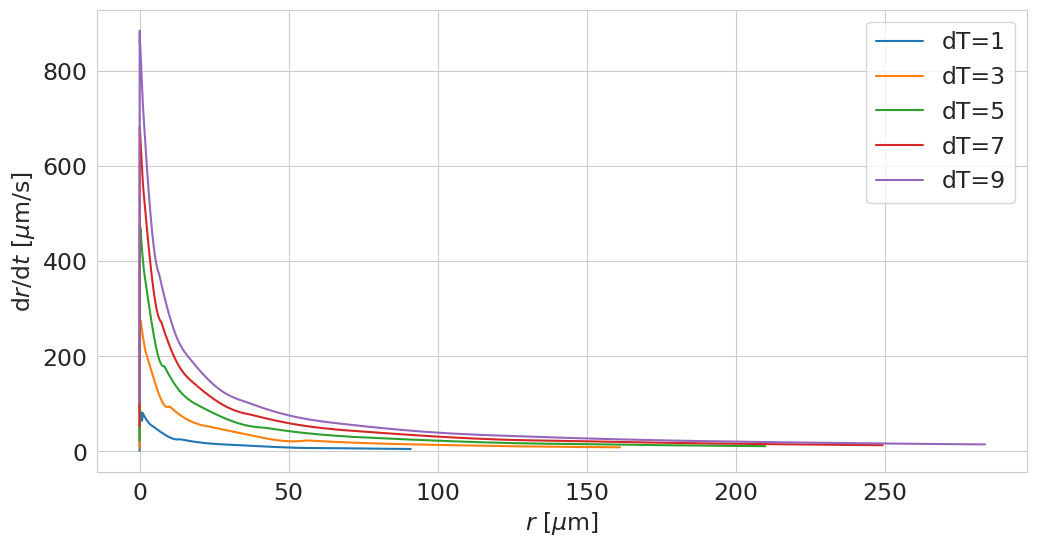

In [4]:
import dropwise
sns.set_style("whitegrid")
fig_drdt = plt.figure(figsize=(12,6))

ax = fig_drdt.add_subplot(1, 1, 1)
plt.rc('font', size=17) 
for i in range(1,11,2):
    dict1=dropwise.Condense(T_wall=303-i,T_inf=303,theta=100,endtime=10,step=1e-5)


    ax.plot(np.array(dict1['r'][0])*1e6,np.array(dict1['k_slope'][0])*1e6,label='dT={}'.format(i))
# ax.set_title('$\mathrm{d}T=10$K',fontsize=17)
# ax.set_ylim([0,0.0002])
ax.legend(loc='upper right')
ax.set_xlabel(r'$r$ [$\mu$m]')
ax.set_ylabel(r'$\mathrm{d}r/\mathrm{d}t$ [$\mu$m/s]')
fig_drdt.savefig('../Reports/Final_report/Figures/drdt_const_assumption.pdf')

In [2]:
het_df_10=pd.read_csv('planar_Sims/planarPoiseuille_10dT/het_data_1.csv')
het_df_5=pd.read_csv('planar_Sims/planarPoiseuille_10dT/het_data_05.csv')
het_df_10=het_df_10[het_df_10['Points:2'].isin([-1.0])]
het_df_5=het_df_5[het_df_5['Points:2'].isin([1.0])]
print(het_df_10.head())


   drdt   qd         M          N  r_het  r_min       rho  rdim  h_int  \
0   0.0  0.0  0.942167  1915240.0    0.0    0.0  0.770889     1    0.0   
1   0.0  0.0  0.942168  1915130.0    0.0    0.0  0.767810     1    0.0   
2   0.0  0.0  0.942168  1915070.0    0.0    0.0  0.767810     1    0.0   
3   0.0  0.0  0.942168  1915120.0    0.0    0.0  0.767810     1    0.0   
4   0.0  0.0  0.942168  1915120.0    0.0    0.0  0.767810     1    0.0   

        p        T  U:0  U:1  U:2  Points:0  Points:1  Points:2  Point ID  \
0  101289  289.364  0.0  0.0  0.0       -10       0.0      -1.0         0   
1  101289  290.480  0.0  0.0  0.0        -9       0.0      -1.0         1   
2  101289  290.480  0.0  0.0  0.0        -8       0.0      -1.0         2   
3  101289  290.480  0.0  0.0  0.0        -7       0.0      -1.0         3   
4  101289  290.480  0.0  0.0  0.0        -6       0.0      -1.0         4   

   Block Number  
0             2  
1             2  
2             2  
3             2  
4 

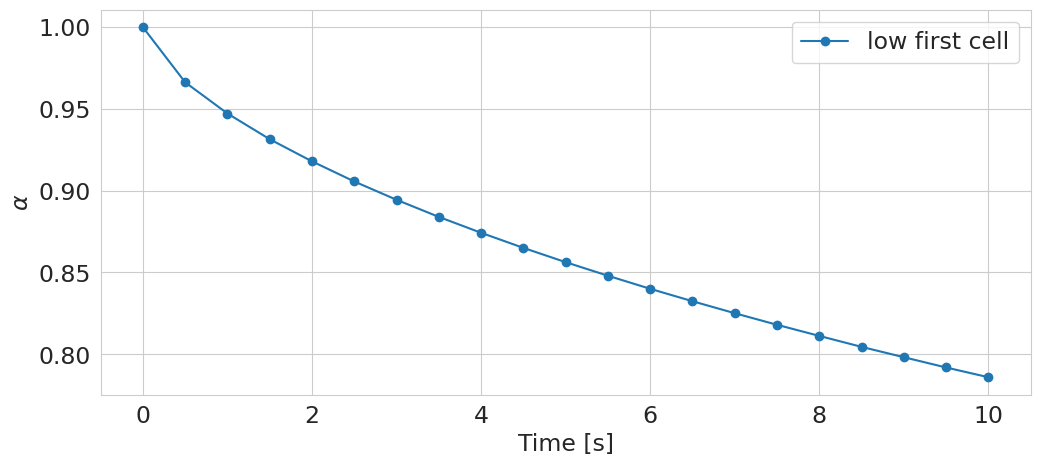

In [5]:
sns.set_style("whitegrid")

fig_drdt = plt.figure(figsize=(12,5))
ax = fig_drdt.add_subplot(1, 1, 1)
 
ax.plot(np.arange(0,10.5,0.5),
        [1,0.9663038,0.94722393,0.93149328,0.91796373,0.90565773,0.89445143,0.88398901,0.87426501,0.86504951,0.85630088,0.84800515,0.84001121,0.83241225,0.82509066,0.81800218,0.81119926,0.80449859,0.79817077,0.79189129,0.78593387],
        marker='o',label='low first cell')

# ax.set_title('$\mathrm{d}T=10$K')
# ax.set_ylim([0,0.0002])
ax.legend()
ax.set_xlabel('Time [s]')
ax.set_ylabel(r'$\alpha$')
plt.rc('font', size=17)
fig_drdt.savefig('../Reports/Final_report/Figures/mass_fraction_time_progression.pdf')